# Explorando los datos de Airbnb


Airbnb provee un servicio en línea que permite a las personas de todo el mundo, alquilar un alojamiento temporal, incluyendo alquileres para vacaciones, departamentos, casas de familia, camas de albergues o habitaciones de hotel. Los usuarios de Airbnb pueden reservar su alojamiento en más de 34,000 ciudades en más de 190 países.

   
**Dataset:** "airbnb.csv"
 
   Hay 15 características que se utilizan para describir a cada usuario en el conjunto de datos:
  * id
  * date_account_created 
  * timestamp_first_active
  * date_first_booking
  * gender
  * age
  * signup_method
  * signup_flow
  * language
  * affiliate_channel
  * affiliate_provider
  * first_affiliate_tracked
  * signup_app
  * first_device_type
  * first_browser


El objetivo de este notebook es mostrar como se levantan los datos (__airbnb.cvs__) mediante __pandas__.

---

## Pre-procesamiento de los datos:

Importamos las librerías necesarias.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import missingno as msno #Ver https://github.com/ResidentMario/missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

---

### Cargamos el archivo csv en un data frame de Pandas

In [2]:
#data from csv files is imported to pandas data frames
data_train= pd.read_csv("../Datos/airbnb.csv") #Path a los datos
print(data_train.columns) #Imprimimos las columnas del dataset
data_train=data_train.sort_values(by='timestamp_first_active')
data_train_copy = data_train

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser'],
      dtype='object')


In [3]:
print(data_train.shape) #Vemos las dimensiones del dataset

(213451, 15)


In [4]:
data_train.head(10) #Mostramos las primeras 10 filas del dataset

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox


Podemos ver que las columnas __gender__ y __age__ tienen datos faltantes.

---

### Manejo de datos faltantes   

In [5]:
#replacing gender and age values which are not present to Nan
data_train.gender.replace('-unknown-',np.nan, inplace=True)
data_train.age.replace('NaN', np.nan, inplace=True)
data_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


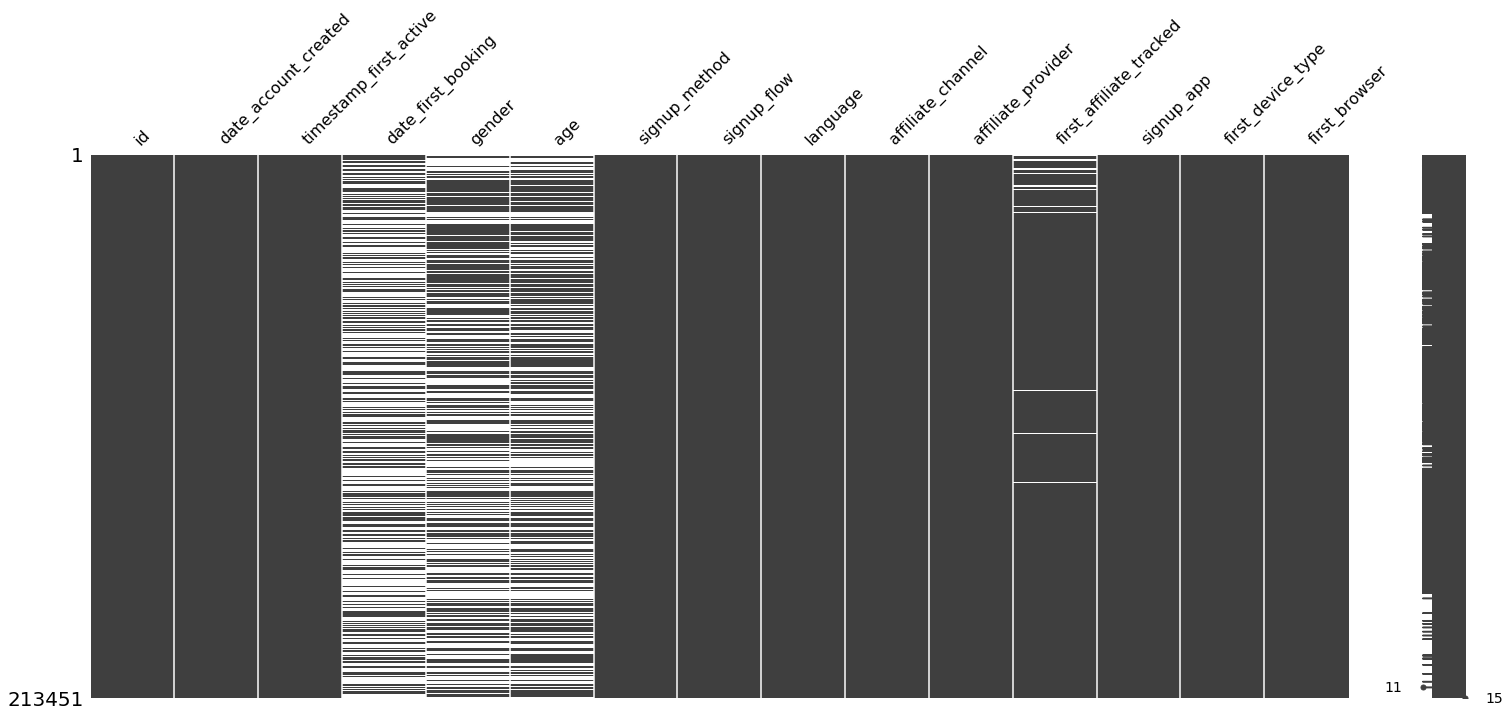

In [6]:
msno.matrix(data_train);